<a href="https://colab.research.google.com/github/MrunaliShigawan/MnistClassifier/blob/master/Mnist_classification_using_CNN_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11493376/11490434 [==============================] - 0s 0us/step
5
train image shape: (60000, 28, 28)
train label shape: (60000,)
test image shape: (10000, 28, 28)
test label shape: (10000,)


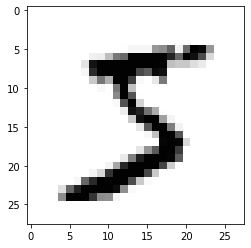

In [1]:
# loading the MNIST dataset
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

# ploting the first image in train dataset
import matplotlib.pyplot as plt
print(y_train[0]) 
plt.imshow(x_train[0], cmap='Greys')

# print shape of each variable
print("train image shape:",x_train.shape)  # output (60000, 28, 28)
print("train label shape:",y_train.shape)  # output (60000,)
print("test image shape:",x_test.shape)  # output (10000, 28, 28)
print("test label shape:",y_test.shape)  # output (10000,)


In [3]:
# convert to 4 dimension
x_train=x_train.reshape([-1,28,28,1])
x_test=x_test.reshape([-1,28,28,1])

# convert to float
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

# divide by max value 255
x_train=x_train/225.0
x_test=x_test/255.0

print("train image shape after converting to 4 dimensional:",x_train.shape) # output (60000, 28, 28, 1)

train image shape after converting to 4 dimensional: (60000, 28, 28, 1)


In [4]:
#one hot encoding of labels
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

print(y_train[0]) # output [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] which means label is 5

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# defining the cnn model
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam

model=Sequential()

# first layer
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(x_train.shape[1:]), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# second layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# flattening followed by dense layer and final output layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [9]:
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard

weights_path = "modelmnist.h5"
model.compile(loss='categorical_crossentropy',  optimizer=Adam(), metrics=['accuracy'])
model_checkpoint = ModelCheckpoint(weights_path, monitor='val_loss', save_best_only=True)
history = model.fit(x_train, y_train, epochs=10, callbacks=[model_checkpoint],validation_data=(x_test, y_test), batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.7285 - accuracy: 0.7533 - val_loss: 0.2696 - val_accuracy: 0.9290
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2247 - accuracy: 0.9315 - val_loss: 0.1558 - val_accuracy: 0.9598
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1480 - accuracy: 0.9549 - val_loss: 0.1301 - val_accuracy: 0.9596
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1138 - accuracy: 0.9652 - val_loss: 0.0981 - val_accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0950 - accuracy: 0.9700 - val_loss: 0.0842 - val_accuracy: 0.9773
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0848 - accuracy: 0.9733 - val_loss: 0.0734 - val_accuracy: 0.9801
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0737 - accuracy: 0.9772 - val_loss: 0.0696 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


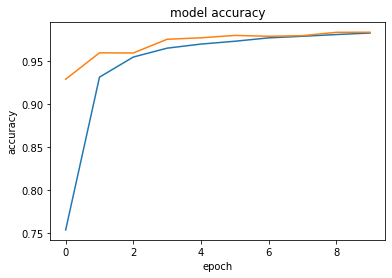

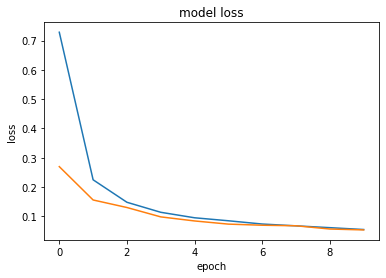

In [11]:
print(history.history.keys())
#  Ploting the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# Ploting the loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [15]:
# evaluate the model on test data
score = model.evaluate(x_test, y_test, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

# predicting on the test data
y_pred=model.predict(x_test)

# ploting confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
y_true_cls = np.argmax(y_test, axis=1)
y_pred_cls = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_true_cls, y_pred_cls)
print(cm)


Test loss: 0.05360203981399536
Test accuracy: 0.9837999939918518
[[ 967    0    0    0    0    1    7    2    3    0]
 [   0 1131    0    0    0    0    1    1    1    1]
 [   2    2 1013    3    1    0    2    7    1    1]
 [   0    1    2  990    0    5    0    7    4    1]
 [   3    0    1    0  949    0    9    0    0   20]
 [   2    1    0    5    0  879    3    1    1    0]
 [   1    2    0    0    1    4  950    0    0    0]
 [   1    4    4    1    0    0    0 1002    1   15]
 [   0    0    1    2    0    2    0    2  963    4]
 [   2    2    1    1    4    2    0    3    0  994]]


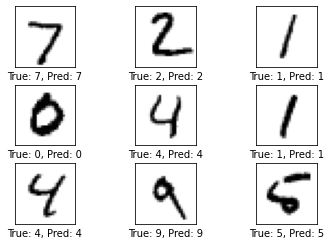

In [16]:
import numpy as np

prediction=model.predict(x_test[0:9])
y_true_cls = np.argmax(y_test[0:9], axis=1)
y_pred_cls = np.argmax(prediction, axis=1)

img_size=28
img_shape = (img_size, img_size)
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        
        ax.set_xlabel(xlabel)
        
       
        ax.set_xticks([])
        ax.set_yticks([])
    
    
    plt.show()

plot_images(x_test[0:9],y_true_cls[0:9],y_pred_cls[0:9])